In [50]:
import pandas as pd
import os
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn import preprocessing
#print(os.getcwd())
path="/Users/atousachaharsoughshirazi/Capstone_two/data"
os.chdir(path)
file="bank-additional-full.csv"
df=pd.read_csv(file, sep=';', header=0)


# Data

In [51]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [52]:
df.shape

(41188, 21)

In [53]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [54]:
#There is no null value in the data set but some are 'unknown'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [55]:
#convert integers to float (for regression?)
df['age']=df['age'].astype(float)
df['previous']=df['previous'].astype(float)
df['duration']=df['duration'].astype(float)
df['campaign']=df['campaign'].astype(float)
df['pdays']=df['pdays'].astype(float)


In [56]:
#number of unique values in each column
column_list = df.columns.values.tolist()
for column_name in column_list:
    print(column_name, df[column_name].nunique())

age 78
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 1544
campaign 42
pdays 27
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 316
nr.employed 11
y 2


In [57]:
column_list = df.columns.values.tolist()
for column_name in column_list:
    print(column_name,': \n', 
          df[column_name].value_counts())

age : 
 31.0    1947
32.0    1846
33.0    1833
36.0    1780
35.0    1759
        ... 
91.0       2
89.0       2
87.0       1
95.0       1
94.0       1
Name: age, Length: 78, dtype: int64
job : 
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
marital : 
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
education : 
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
default : 
 no         32588
unknown     8597
yes            3
Name: default, dtype: int64
housing : 
 yes        215

In [58]:
#There are 12 duplicate rows as can be seen from the analysis below and the profile report.
duplicateRowsDF = df[df.duplicated(keep=False)]
duplicateRowsDF
df=df.drop_duplicates(keep='first',ignore_index=True)
df.shape

(41176, 21)

In [59]:
#report=df.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
#report

## Data exploration report
### Column descriptions: 

Client info:


 1. age (numeric)
 2. job : type of job (categorical: 'admin.','blue collar', 'entrepreneur',  'housemaid', 'management', 'retired', 'selfemployed','services','student','technician','unemployed','unknown')
 3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means  divorced or widowed)
 4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course', 'university.degree','unknown')
 5. default: has credit in default? (categorical: 'no','yes','unknown')
 6. housing: has a housing loan? (categorical: 'no','yes','unknown')
 7. loan: has personal loan? (categorical: 'no','yes','unknown')
 
 Related with the last contact of the current campaign:
 
 8. contact: contact communication type (categorical: 'cellular','telephone') 
 9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
 10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
 11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. I dropped it.
 
 Other attributes:
 
 
 12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 13. pdays: number of days that passed by after the client was last contacted from a previous campaign
(numeric; 999 means client was not previously contacted.
 14. previous: number of contacts performed before this campaign and for this client (numeric)
 15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
 
 Social and economic context attributes:
 
 
 16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
 17. cons.price.idx: consumer price index - monthly indicator (numeric) 
 18. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
 19. euribor3m: euribor 3 month rate - daily indicator (numeric)
 20. nr.employed: number of employees - quarterly indicator (numeric)
 
 
 ### Missing values
 The result of exploring the columns with value_counts():

* There is no null value in the dataset but some are 'unknown' 
* jobs: 330 are unknown
* marital status: 80 are unknown
* education: 1731 are unknown
* default: 8597 are unknown. In this column there are only 3 'yes' values, the rest are either 'no' or unknown. (Drop?)
* housing: 990 are unknown
* loan: 990 are unknown (the same sows as the housing unknowns)
* duration: I drop the column later. Look at the explanation above in the column description.
* pdays: the number of days passed by after the last call. 999 means that the client was not previouly contacted and this case needs special handling. 39673 cases of 999 are present. I replaced the '999' value with '-1' to be in the range of other values(0-27).
* There are 35563 rows where ‘previous’ is 0, meaning that the client was not previously contacted. This automatically is associated with ‘pdays’=999 and ‘poutcome’=nonexistent. I confirmed that on the data. However, there are 39673 rows that have ‘pdays’=999. That shows that there are 4110 rows with pdays=999 (meaning that the customer was not previously contacted) but all these rows have a ‘poutcome’ of failure. That means for 4110 rows the duration of the call was not recorded and they labeled them to 999 by mistake. 
* all other columns have no unknown values



In [60]:
df['pdays']=df['pdays'].replace(999, -1)

In [61]:
dft=df[df['housing']=='unknown']
dft['loan'].value_counts()

unknown    990
Name: loan, dtype: int64

In [62]:
dft=df[df['pdays']==999]
dft['previous'].value_counts()

Series([], Name: previous, dtype: int64)

### Adding the 'year' column

We are trying to predict the outcome on column 'y', 'yes' means that the client subscribed to the loan and 'no' means that it didn't. According to the chart below there were more unsuccessful outcomes.
However, this result is for the years 2008-2010 combined. In order to see the effect of the contact month or year on the outcome we need to groupby the outcomes for each year and/or month. Thus, I need to add a 'year' column with values 2008, 2009 and 2010 for appropriate rows.

* Year 2008 starts on May (beginning of the dataset row 0) and ends on December.
* Year 2009 starts on March and ends on December.
* Year 2010 starts on March and ends on November(the last row of the dataset).

In the box below I find the ending index for each month. 
For the purpose of adding a 'year' column I only need to know which row December ends but it was interesting to find
the ending index for each month.

In [63]:
month=list(df.month.unique())
for i in month:
    i_index=df[df['month']==i].index
    i_startindex=[]
    for j in range(len(i_index)-1):
        if (i_index[j+1]-i_index[j])>1:
            i_startindex.append(i_index[j])
            i_startindex.append(i_index[j+1])
       
    print(i, i_startindex)
    

may [7761, 30421, 36213, 39556]
jun [12135, 36214, 36928, 39768]
jul [18816, 36929, 37105, 39997]
aug [23989, 37106, 37875, 40308]
oct [24056, 38143, 38588, 40844]
nov [27671, 38589, 38945, 41048]
dec [27681, 38946]
mar [27963, 39118]
apr [30420, 39382]
sep [38142, 40541]


In order to add a 'year' column, I first added a column with values equal to 'month', then replaced them with proper values for the year. 
There may be a better way to this, I will check out other ways to add a column!
Some months are missing for example year 2008 does not have any contacts for months of Jan-Apr and Sep. Year 2009 has contacts for March-December months, and year 2010 has March-November. By checking the head of the dataframe we can see that the 'year' has been added.


In [64]:
df['year']=df['month' ]

df.iloc[0:27682,21]='2008'
df.iloc[27682:39119, 21]='2009'
df.iloc[39119:41176, 21]='2010'
df.head(-5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,-1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,-1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,-1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41166,62.0,retired,married,university.degree,no,no,no,cellular,nov,thu,...,6.0,3.0,success,-1.1,94.767,-50.8,1.031,4963.6,yes,2010
41167,64.0,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,-1.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2010
41168,36.0,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,-1.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2010
41169,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,-1.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2010


We can see from the analysis below that the 'year' column is an object type. We change it to an integer.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  float64
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  float64
 11  campaign        41176 non-null  float64
 12  pdays           41176 non-null  float64
 13  previous        41176 non-null  float64
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [66]:
df.year.astype('int64')

0        2008
1        2008
2        2008
3        2008
4        2008
         ... 
41171    2010
41172    2010
41173    2010
41174    2010
41175    2010
Name: year, Length: 41176, dtype: int64

# EDA

### Correlated variables

In [67]:
#Calculate the correlation coefficients
corr =df.corr()
corr.round(2).style.background_gradient(cmap='coolwarm')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000000,0.000000,0.020000,0.020000,-0.000000,0.000000,0.130000,0.010000,-0.020000
duration,-0.000000,1.000000,-0.070000,0.050000,0.020000,-0.030000,0.010000,-0.010000,-0.030000,-0.040000
campaign,0.000000,-0.070000,1.000000,-0.040000,-0.080000,0.150000,0.130000,-0.010000,0.140000,0.140000
pdays,0.020000,0.050000,-0.040000,1.000000,0.510000,-0.230000,-0.050000,0.070000,-0.260000,-0.340000
previous,0.020000,0.020000,-0.080000,0.510000,1.000000,-0.420000,-0.200000,-0.050000,-0.450000,-0.500000
emp.var.rate,-0.000000,-0.030000,0.150000,-0.230000,-0.420000,1.000000,0.780000,0.200000,0.970000,0.910000
cons.price.idx,0.000000,0.010000,0.130000,-0.050000,-0.200000,0.780000,1.000000,0.060000,0.690000,0.520000
cons.conf.idx,0.130000,-0.010000,-0.010000,0.070000,-0.050000,0.200000,0.060000,1.000000,0.280000,0.100000
euribor3m,0.010000,-0.030000,0.140000,-0.260000,-0.450000,0.970000,0.690000,0.280000,1.000000,0.950000
nr.employed,-0.020000,-0.040000,0.140000,-0.340000,-0.500000,0.910000,0.520000,0.100000,0.950000,1.000000


* From the heatmap above we can see that 'euribor3m' and 'emp.var.rate' are highly correlated so we drop one of them.
* For every 'cons.price.idx' there is a unique  'cons.conf.idx'. So it is safe to drop one of these columns (analysis below).
* For every 'nr.employed' there is a unique 'emp.var.rate'. So it is safe to drop one of these columns (analysis below).
* We also drop the 'duration' variable (look at the data section above).

In [68]:
df['cons.price.idx' ].value_counts()

93.994    7762
93.918    6681
92.893    5793
93.444    5173
94.465    4374
93.200    3615
93.075    2457
92.201     770
92.963     715
92.431     446
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     177
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

In [69]:
df['cons.conf.idx'].value_counts()

-36.4    7762
-42.7    6681
-46.2    5793
-36.1    5173
-41.8    4374
-42.0    3615
-47.1    2457
-31.4     770
-40.8     715
-26.9     446
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     177
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

In [70]:
df['emp.var.rate'].value_counts()

 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [71]:
df['nr.employed'].value_counts()

5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [72]:
df.drop(['duration','euribor3m','cons.conf.idx', 'nr.employed'], axis=1, inplace=True)
corr =df.corr()

corr.round(2).style.background_gradient(cmap='coolwarm')

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx
age,1.000000,0.000000,0.020000,0.020000,-0.000000,0.000000
campaign,0.000000,1.000000,-0.040000,-0.080000,0.150000,0.130000
pdays,0.020000,-0.040000,1.000000,0.510000,-0.230000,-0.050000
previous,0.020000,-0.080000,0.510000,1.000000,-0.420000,-0.200000
emp.var.rate,-0.000000,0.150000,-0.230000,-0.420000,1.000000,0.780000
cons.price.idx,0.000000,0.130000,-0.050000,-0.200000,0.780000,1.000000


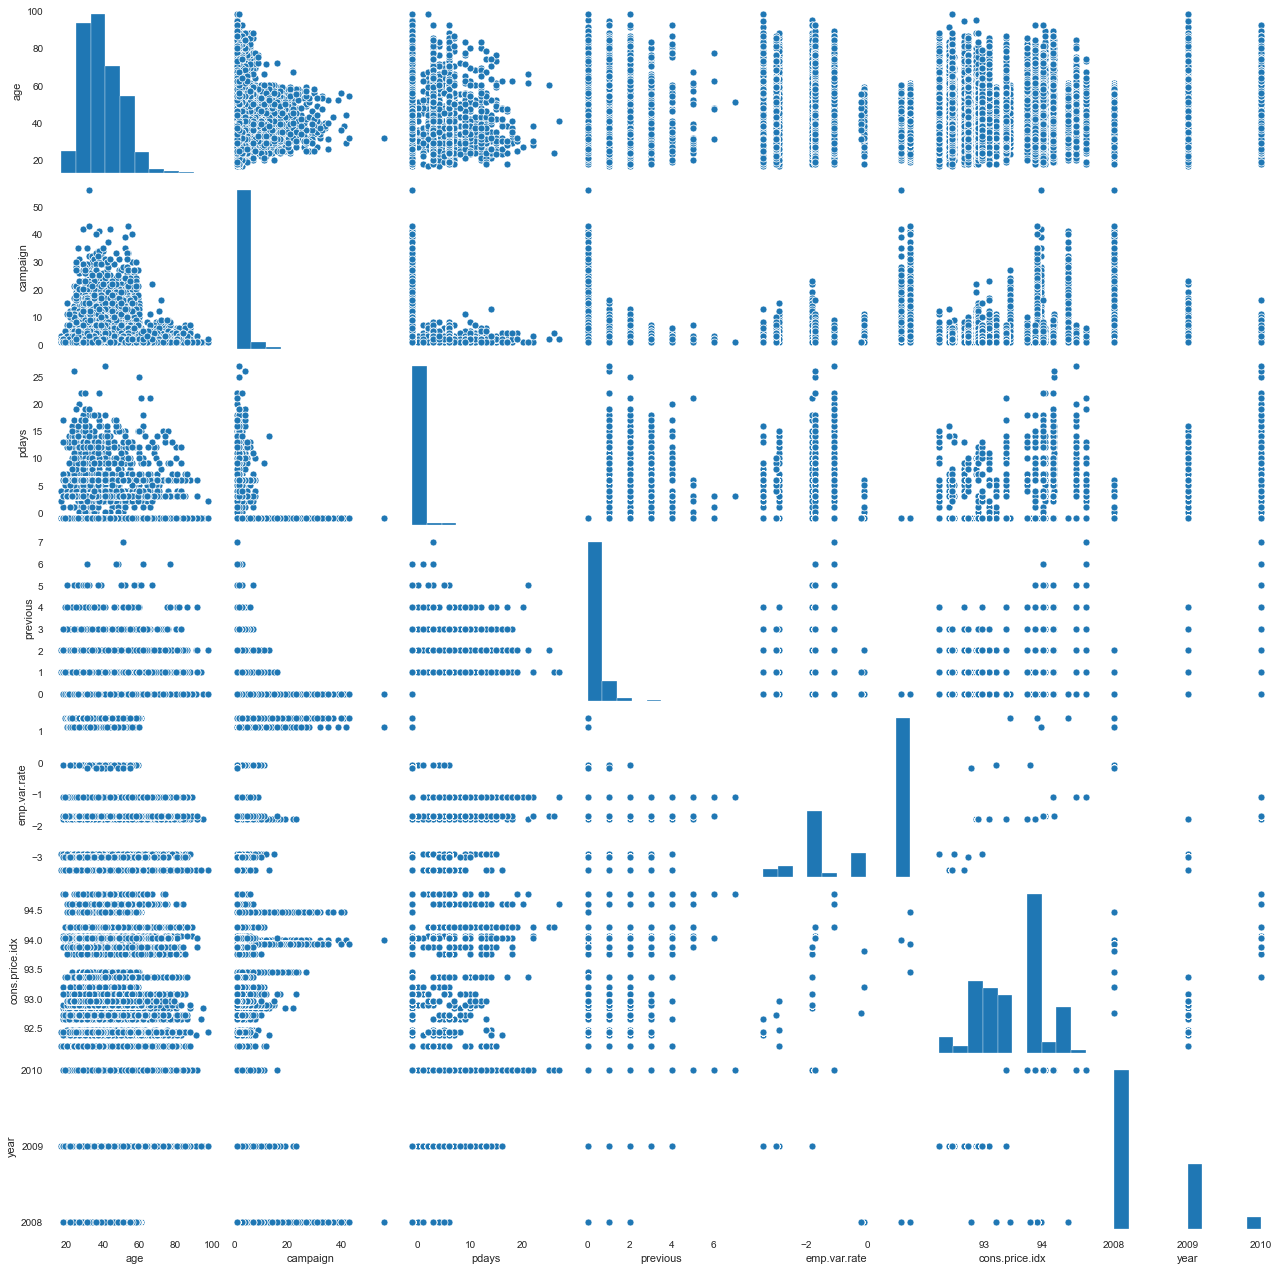

In [73]:
sns.pairplot(df)

In [74]:
#df1=df.set_index('month', 'y').groupby('month').mean()
#df1=df.set_index('month').groupby('month').count()
#df1
#df[df['y']=='yes']

In [75]:
#sns.pairplot(df1)

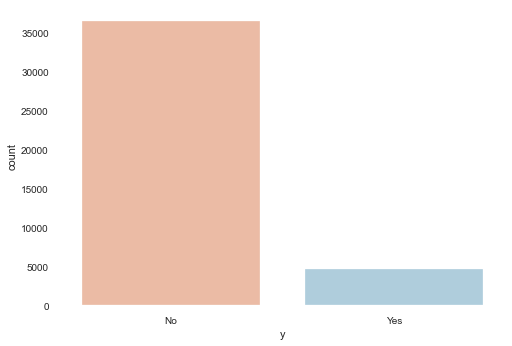

In [76]:
plt.figure()
sns.countplot(x='y', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()


In the figure below we can see the count plot grouped by the year. We can see that the number of 'yes' outcomes did not change much from 2008 to 2010. But the number of 'no' outcomes significantly decreased and in year 2010 there are almost the same number of yes/no outcomes.

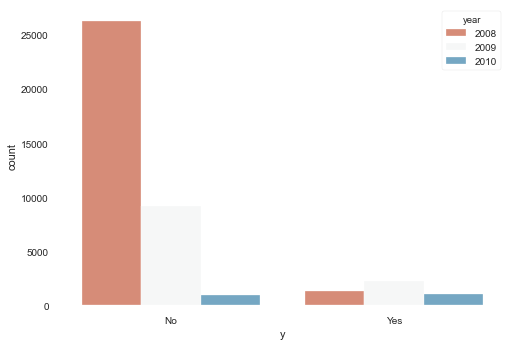

In [77]:
plt.figure()
sns_plot=sns.countplot(x='y', hue='year', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()
fig = sns_plot.get_figure()
fig.savefig('/Users/atousachaharsoughshirazi/Capstone_two/figures/targetcountplotbyyear.png') 

In [78]:
#The number of contacts decreased from year 2008 to 2010.
dfy=df[['year','y']]
dfyy=dfy.set_index('year').groupby(by=['year'])
dfyy['y'].value_counts()

year  y  
2008  no     26343
      yes     1339
2009  no      9209
      yes     2228
2010  yes     1072
      no       985
Name: y, dtype: int64

In [79]:
dfn=df[['year','month','y']]
dfnn=dfn.set_index('year','month').groupby(by=['year','month'])
dfnn['y'].value_counts()

year  month  y  
2008  aug    no     4902
             yes     271
      dec    no        9
             yes       1
      jul    no     6274
             yes     407
      jun    no     4186
             yes     188
      may    no     7522
             yes     240
      nov    no     3425
             yes     190
      oct    yes      42
             no       25
2009  apr    no     2015
             yes     442
      aug    no      506
             yes     264
      dec    yes      88
             no       84
      jul    no      112
             yes      65
      jun    no      451
             yes     264
      mar    no      156
             yes     127
      may    no     5269
             yes     524
      nov    no      189
             yes     168
      oct    no      266
             yes     180
      sep    no      161
             yes     106
2010  apr    yes      97
             no       77
      aug    yes     120
             no      113
      jul    yes     176
        

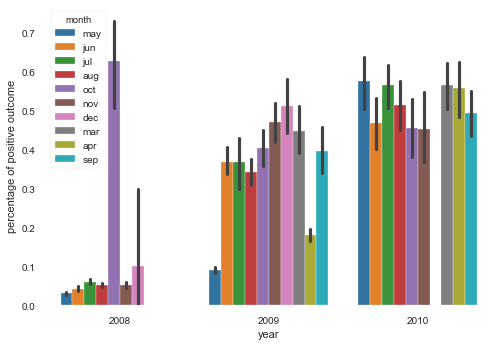

In [80]:
dfn=dfn.replace({'y':{'yes':1 ,'no': 0 }})

sns_plot=sns.barplot(x='year', y='y', hue='month',data=dfn)
sns_plot.set(ylabel='percentage of positive outcome')
plt.show()
fig = sns_plot.get_figure()
fig.savefig('/Users/atousachaharsoughshirazi/Capstone_two/figures/targetbarplotbyyearandmonth.png') 

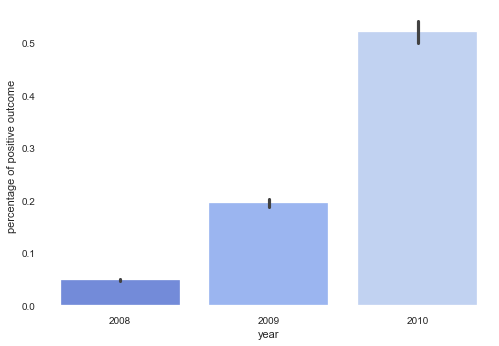

In [81]:
dfy=dfy.replace({'y':{'yes':1 ,'no': 0 }})

sns_plot=sns.barplot(x='year', y='y',data=dfy, palette=sns.color_palette("coolwarm", 7))
sns_plot.set(ylabel='percentage of positive outcome')
plt.show()
fig = sns_plot.get_figure()
fig.savefig('/Users/atousachaharsoughshirazi/Capstone_two/figures/targetbarplotbyyear.png') 

In [82]:
dfnn=dfn.set_index('month','year').groupby(by=['month', 'year'])
dfnn['y'].value_counts()

month  year  y
apr    2009  0    2015
             1     442
       2010  1      97
             0      77
aug    2008  0    4902
             1     271
       2009  0     506
             1     264
       2010  1     120
             0     113
dec    2008  0       9
             1       1
       2009  1      88
             0      84
jul    2008  0    6274
             1     407
       2009  0     112
             1      65
       2010  1     176
             0     135
jun    2008  0    4186
             1     188
       2009  0     451
             1     264
       2010  0     122
             1     107
mar    2009  0     156
             1     127
       2010  1     149
             0     114
may    2008  0    7522
             1     240
       2009  0    5269
             1     524
       2010  1     122
             0      90
nov    2008  0    3425
             1     190
       2009  0     189
             1     168
       2010  0      70
             1      58
oct    2008  1     

In [83]:
df1=df[['month','y']] 
df2=df1.groupby('month')
df2['y'].value_counts()


month  y  
apr    no      2092
       yes      539
aug    no      5521
       yes      655
dec    no        93
       yes       89
jul    no      6521
       yes      648
jun    no      4759
       yes      559
mar    yes      276
       no       270
may    no     12881
       yes      886
nov    no      3684
       yes      416
oct    no       402
       yes      315
sep    no       314
       yes      256
Name: y, dtype: int64

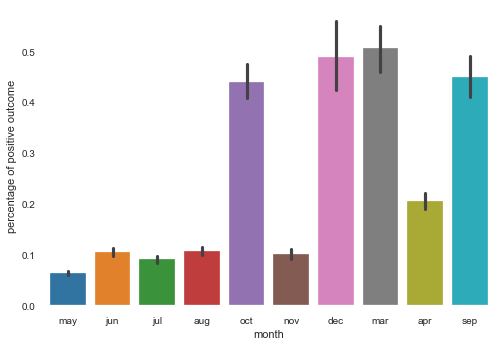

In [84]:
df2=df1.replace({'y':{'yes':1 ,'no': 0 }})

sns_plot=sns.barplot(x='month', y='y', data=df2)
sns_plot.set(ylabel='percentage of positive outcome')
plt.show()

In [85]:
pd.to_numeric(df2.y)
df3=pd.DataFrame(df2.groupby('month', sort=False).sum())
# df3.reindex()
df3
# #plt.bar(x='month', height='y', hue='month', data=df3)
# #sns.swarmplot(x='month', y='y', data=df3)


,y
month,
may,886
jun,559
jul,648
aug,655
oct,315
nov,416
dec,89
mar,276
apr,539


In [86]:
df1['month'].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [87]:
# for i in df.columns.values:
#     dfi=df[[i ,'y']]
#     dfi2=dfi.replace({'y':{'yes':1 ,'no': 0 }})
#     pd.to_numeric(dfi2.y)
#     df3=pd.DataFrame(dfi2.set_index(i).groupby(i).sum().sort_values(by=['y'], ascending=False))
#     plt.bar(i,'y', data=df3)
#     plt.show()
#     #print(dfi2.set_index(i).groupby(i).sum().sort_values(by=['y'], ascending=False))
    
    


In [88]:
# for i in df.columns.values:
#     dfi=df[[i ,'y']]
#     dfi2=dfi.replace({'y':{'yes':1 ,'no': 0 }})
#     sns.barplot(x=i, y='y', data=df2)
#     plt.show()



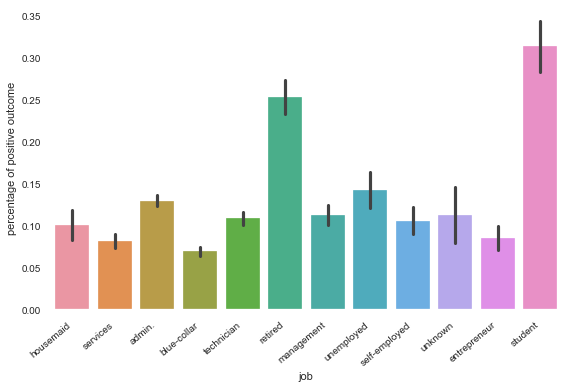

In [89]:
df1=df[['job','y']]
df2=df1.replace({'y':{'yes':1 ,'no': 0 }})

sns_plot=sns.barplot(x='job', y='y', data=df2)
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=40, ha="right")
sns_plot.set(ylabel='percentage of positive outcome')
plt.tight_layout()
plt.show()
fig = sns_plot.get_figure()
fig.savefig('/Users/atousachaharsoughshirazi/Capstone_two/figures/jobbarplotbyyear.png') 

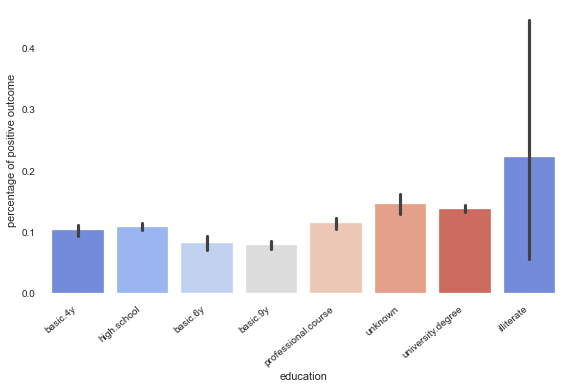

In [90]:
df1=df[['education','y']]
df2=df1.replace({'y':{'yes':1 ,'no': 0 }})

sns_plot=sns.barplot(x='education', y='y', data=df2, palette=sns.color_palette("coolwarm", 7))
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=40, ha="right")
sns_plot.set(ylabel='percentage of positive outcome')
plt.tight_layout()
plt.show()
fig = sns_plot.get_figure()
fig.savefig('/Users/atousachaharsoughshirazi/Capstone_two/figures/educationbarplotbyyear.png') 

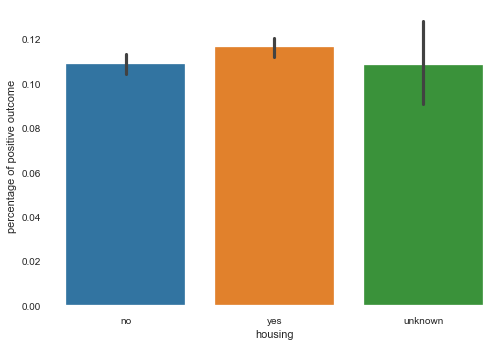

In [91]:
df1=df[['housing','y']]
df2=df1.replace({'y':{'yes':1 ,'no': 0 }})

sns_plot=sns.barplot(x='housing', y='y', data=df2)
sns_plot.set(ylabel='percentage of positive outcome')
plt.show()
fig = sns_plot.get_figure()
fig.savefig('/Users/atousachaharsoughshirazi/Capstone_two/figures/housingbarplot.png')

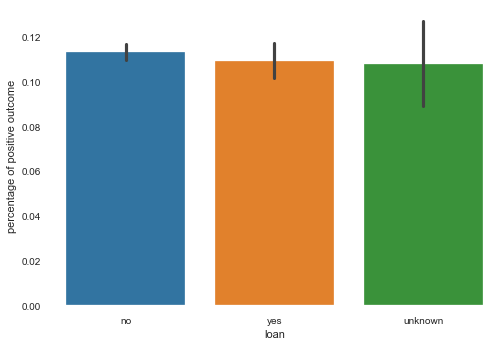

In [92]:
df1=df[['loan','y']]
df2=df1.replace({'y':{'yes':1 ,'no': 0 }})

sns_plot=sns.barplot(x='loan', y='y', data=df2)
sns_plot.set(ylabel='percentage of positive outcome')
plt.show()
fig = sns_plot.get_figure()
fig.savefig('/Users/atousachaharsoughshirazi/Capstone_two/figures/loanbarplot.png')

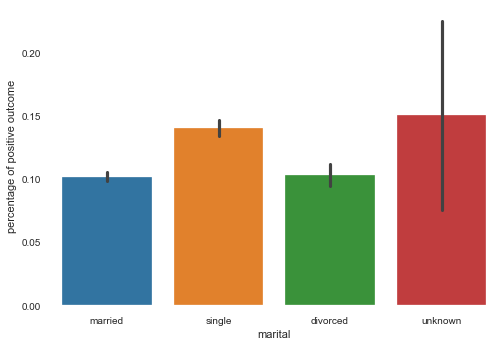

In [93]:
df1=df[['marital','y']]
df2=df1.replace({'y':{'yes':1 ,'no': 0 }})

sns_plot=sns.barplot(x='marital', y='y', data=df2)
sns_plot.set(ylabel='percentage of positive outcome')

plt.show()

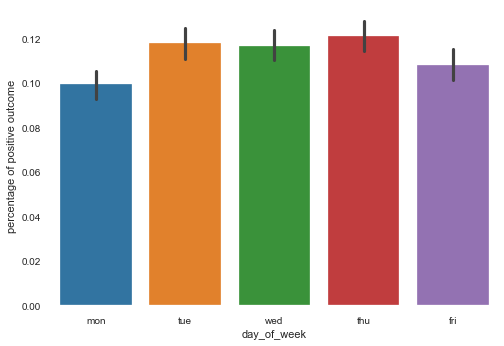

In [94]:
df1=df[['day_of_week','y']]
df2=df1.replace({'y':{'yes':1 ,'no': 0 }})

sns_plot=sns.barplot(x='day_of_week', y='y', data=df2)
sns_plot.set(ylabel='percentage of positive outcome')
plt.show()

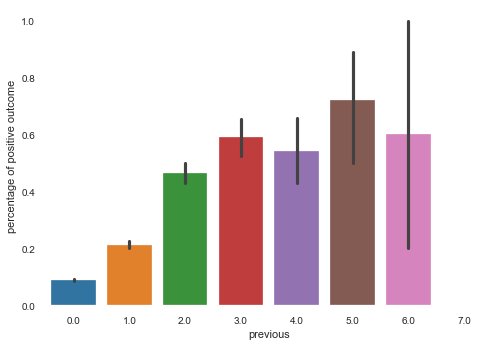

In [95]:
df1=df[['previous','y']]
df2=df1.replace({'y':{'yes':1 ,'no': 0 }})

sns_plot=sns.barplot(x='previous', y='y', data=df2)
sns_plot.set(ylabel='percentage of positive outcome')
plt.show()

In [96]:
#df.drop(['default', 'loan','housing'], axis=1, inplace=True)
#df.head()

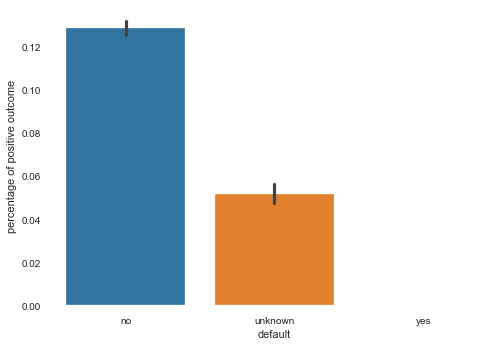

In [97]:
df1=df[['default','y']]
df2=df1.replace({'y':{'yes':1 ,'no': 0 }})

sns_plot=sns.barplot(x='default', y='y', data=df2)
sns_plot.set(ylabel='percentage of positive outcome')
plt.show()

# Modeling

In [98]:
#df.drop(['duration'], axis=1, inplace=True)
#df.head()

#df=df[df['year']=='2010']
df.drop(['pdays','year'], axis=1, inplace=True)
df=pd.get_dummies(df, drop_first=True)

#df.dtypes
y=df['y_yes']
X=df.drop(['y_yes'], axis=1)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 
# # # Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=42)

# # # Create the classifier: logreg
logreg = LogisticRegression(class_weight='balanced')

# # # Fit the classifier to the training data
logreg.fit(X_train, y_train)

# # # Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# # # Compute and print the confusion matrix and classification report
confusion_matrix(y_test, y_pred)
classification_report(y_test, y_pred)



'              precision    recall  f1-score   support\n\n           0       0.95      0.83      0.89     10929\n           1       0.34      0.66      0.45      1424\n\n    accuracy                           0.81     12353\n   macro avg       0.64      0.75      0.67     12353\nweighted avg       0.88      0.81      0.84     12353\n'